# Support Vector Machine - SVR

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
ds = pd.read_csv('Position_Salaries.csv')

In [3]:
ds.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
X = ds.iloc[:,1:-1].values
y = ds.iloc[:, -1].values

In [5]:
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Visualising the dataset

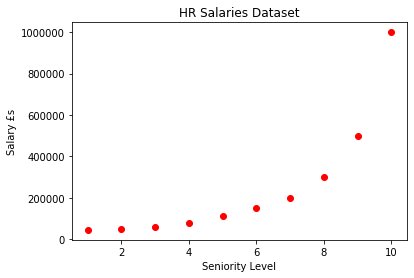

In [6]:
# As the dataset appears to be following a parabolic path, a linear regression will be a poor fit.

plt.scatter(X, y, c='red')
plt.title('HR Salaries Dataset')
plt.xlabel('Seniority Level')
plt.ylabel('Salary £s')
plt.show()

## Taking care of missing data

In [7]:
# There is no missing data

## Encoding categorical data

In [8]:
# There is no categorical data to encode

## Splitting the dataset into the training set and test set

In [9]:
# As the dataset is small, we will not be splitting the dataset into the training set and testing set as we wish 
# to have maximum accuracy, therefore taking the whole data into consideration. As this is a salary negotiation,
# we must be confident in our model as the negotiation can fall apart if we go ahead with inaccurate presumptions.

## Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
XX = sc_X.fit_transform(X)
yy = sc_y.fit_transform(y.reshape(-1,1))

In [12]:
print(XX)
print(yy)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Fitting the SVM to the dataset

In [13]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(XX, yy)

/Users/mohitgoel/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

## Predicting the position level 6.5

In [16]:
y_pred = sc_y.inverse_transform(svr.predict(sc_X.transform([[6.5]])))

In [17]:
print(y_pred)

[170370.0204065]


## Visualising the Support Vector Regression model

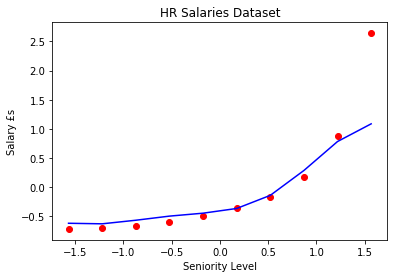

In [20]:
plt.scatter(XX, yy, c = 'red')
plt.plot(XX, svr.predict(sc_X.fit_transform(X)), c='blue')
plt.title('HR Salaries Dataset')
plt.xlabel('Seniority Level')
plt.ylabel('Salary £s')
plt.show()         

## Visualising the Support Vector Regression model in higher resolution (smoother curve)

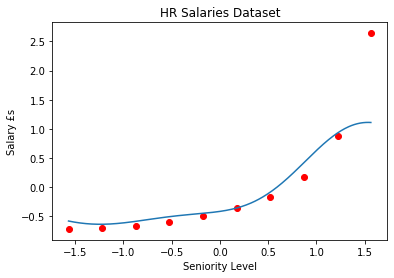

In [22]:
X_grid = np.arange(min(XX), max(XX), step = 0.01)
X_grid = X_grid.reshape((len(X_grid)), 1)
plt.scatter(XX, yy, c='red')
plt.plot(X_grid, svr.predict(sc_X.fit_transform(X_grid)))
plt.title('HR Salaries Dataset')
plt.xlabel('Seniority Level')
plt.ylabel('Salary £s')
plt.show()         